    fluxmode:
      High Flux (HF)    = 9.0 deg
      Intermidiste (AI) = 4.4 deg
      High Res (HR)     = 2.0 deg
    Frequency DoubleDisk Chopper 1: (Hz)         300 Hz for HF       240 Hz for AI        180 Hz for HR
    Frequency DoubleDisk Chopper 2: (Hz)         300 Hz for HF       240 Hz for AI        180 Hz for HR


In [2]:
workdir = '~/dv/sns-chops/resolution/CNCS/mcvine'
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine


In [ ]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

import histogram.hdf as hh, histogram as H
import mcvine, mcvine.components
from mcni.utils import conversion as C

from matplotlib import pyplot as plt
%matplotlib notebook

import mcvine, mcvine.components as mcomps

from mantid import simpleapi as msa

from mcni.utils import conversion as conv

# Instrument sim script

In [4]:
!head -n 10 /SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/instrument/CNCS/mcstas/CNCS_Dec_2016_py.instr

/*******************************************************************************
*
* McStas, neutron ray-tracing package
*         Copyright 1997-2002, All rights reserved
*         Risoe National Laboratory, Roskilde, Denmark
*         Institut Laue Langevin, Grenoble, France
*
* *******************************************************************************/




convert mcstas instr to mcvine

In [6]:
# !mcvine mcstas convertinstrument /SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/instrument/CNCS/mcstas/CNCS_Dec_2016_py.instr

Modified CNCS_Dec_2016_py_mcvine.py by hand

In [7]:
!head -n 10 CNCS_Dec_2016_py_mcvine.py

import mcvine, mcvine.components as mcomps
import numpy as np

def instrument(Ei=10, fluxmode=14.0, f1=300., f2=60., f3=60., f41=300., f42=300.):
    from numpy import sqrt
    # /*  global guide properties, taken from G. Granroth source */
    Gu_alpha = 5.0;
    Gu_R = 0.99;
    Gu_W = 0.002;
    Gu_Qc = 0.02;


## Check

In [4]:
from mcvine import run_script
import mcvine, mcvine.components as mcomps

In [14]:
%%time
run_script.run1('./CNCS_Dec_2016_py_mcvine.py', 'debug', ncount=1e6, overwrite_datafiles=True, Erange_fraction=0.25)

7.5 12.5
CPU times: user 6.2 s, sys: 1.16 s, total: 7.36 s
Wall time: 13.7 s


In [ ]:
plt.figure()
IE = hh.load('./debug/beam_I_E.h5')
plt.plot(IE.energy, IE.I, '-')

In [ ]:
plt.figure()
m1 = hh.load('./debug/tof1b.h5')
plt.plot(m1.tof, m1.I, '-')

In [ ]:
plt.figure()
m2 = hh.load('./debug/tof2.h5')
plt.plot(m2.tof, m2.I, '-')

In [ ]:
plt.figure()
m3 = hh.load('./debug/tof3a.h5')
plt.plot(m3.tof, m3.I, '-')

# Ei=1meV high resolution

In [11]:
mkdir -p Ei_1meV_check_monitors/beam-Ei_1.0-fluxmode_2.0

In [51]:
%%time
run_script.run_mpi(
    './CNCS_Dec_2016_py_mcvine.py', 'Ei_1meV_check_monitors/beam-Ei_1.0-fluxmode_2.0/_m2sout',
    ncount=1e8, nodes=10,
    Ei=1, Erange_fraction=0.99,
    fluxmode=2.0, f41=180., f42=180.
)

CPU times: user 6.41 ms, sys: 170 ms, total: 177 ms
Wall time: 11min 57s


Create a fake beam directory with postprocessed data

In [123]:
!mkdir -p ./Ei_1meV_check_monitors/beam-Ei_1.0-fluxmode_2.0/out
!cp ./Ei_1meV_check_monitors/beam-Ei_1.0-fluxmode_2.0/_m2sout/neutrons \
    ./Ei_1meV_check_monitors/beam-Ei_1.0-fluxmode_2.0/out/neutrons
!cp ./Ei_1meV/beam-Ei_1.0-fluxmode_2.0/out/props.json ./Ei_1meV_check_monitors/beam-Ei_1.0-fluxmode_2.0/out/

In [ ]:
plt.figure()
IE = hh.load('./Ei_1meV_check_monitors/beam-Ei_1.0-fluxmode_2.0/_m2sout/beam_I_E.h5')
plt.plot(IE.energy, IE.I, '+-')
plt.xlim(0.99, 1.01)

<IPython.core.display.Javascript object>


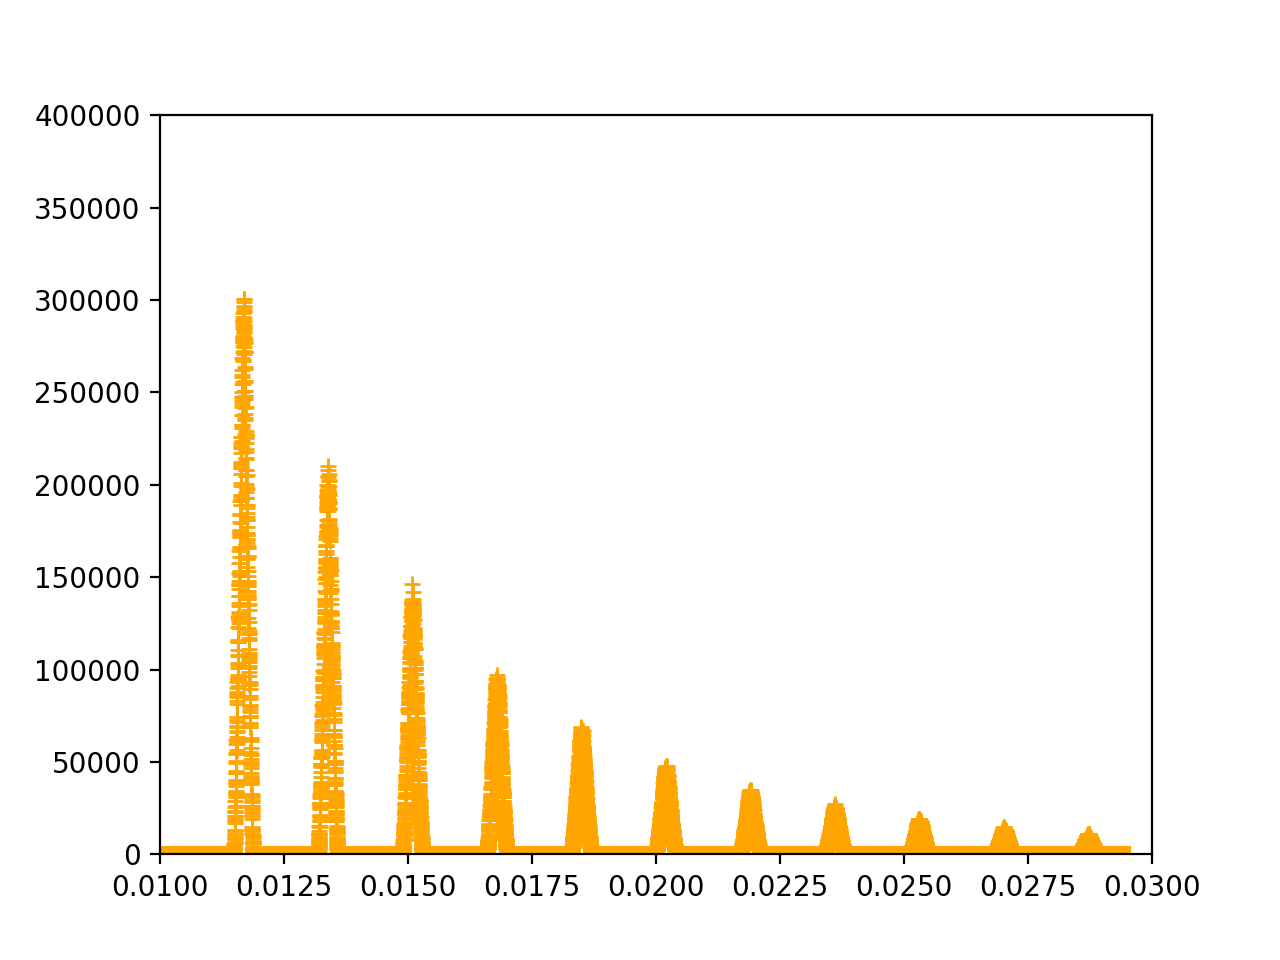

(0.01, 0.03)

In [71]:
plt.figure()
m1 = hh.load('./Ei_1meV_check_monitors/beam-Ei_1.0-fluxmode_2.0/_m2sout/tof1b.h5')
plt.plot(m1.tof, m1.I, '+', color='orange')
plt.ylim(0, 4e5)
plt.xlim(0.01, 0.03)

In [53]:
v = conv.e2v(1.)
print v
print 6.555/v*1e6

437.39331372421475
14986.511668838766


In [23]:
16796-15091

1705

In [24]:
1.e6/300/2

1666.6666666666667

<IPython.core.display.Javascript object>


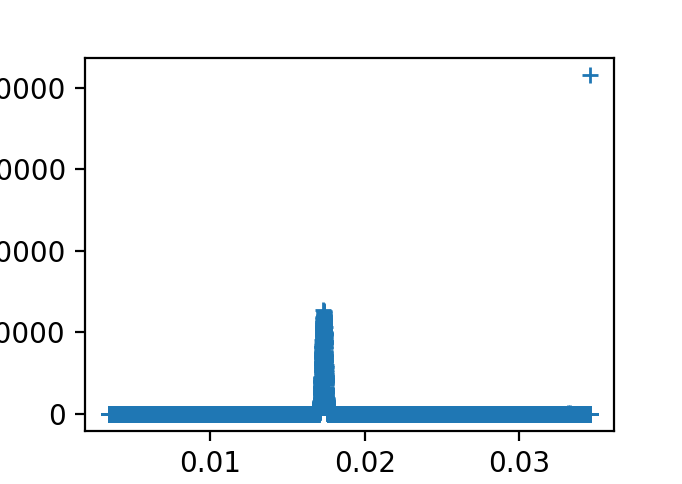

In [54]:
plt.figure()
m2 = hh.load('./Ei_1meV_check_monitors/beam-Ei_1.0-fluxmode_2.0/_m2sout/tof2.h5')
plt.plot(m2.tof, m2.I, '+')
# plt.xlim(0.0165, 0.0179)

<IPython.core.display.Javascript object>


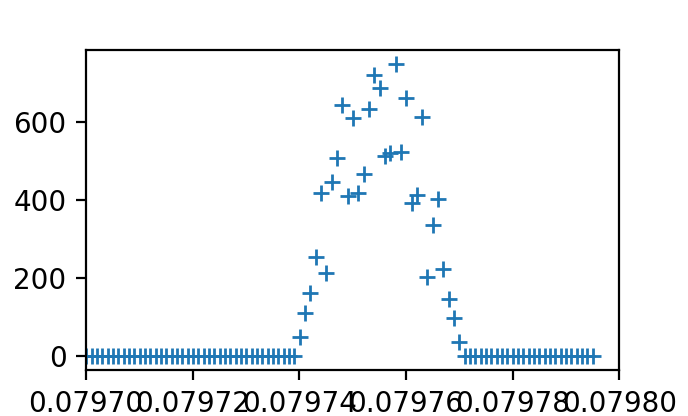

(0.0797, 0.0798)

In [27]:
plt.figure()
m3 = hh.load('./Ei_1meV_check_monitors/beam-Ei_1.0-fluxmode_2.0/_m2sout/tof3a.h5')
plt.plot(m3.tof, m3.I, '+')
plt.xlim(0.0797, 0.0798)

In [29]:
mons = msa.LoadNexusMonitors("/SNS/CNCS/IPTS-20360/nexus/CNCS_274526.nxs.h5")

In [30]:
msa.Rebin(InputWorkspace='mons', OutputWorkspace='mons', Params="%s,%s,%s" % (0, 1., 80000))

EventWorkspace
Title: V-foil HR, T=300 K, Ei=1.00919901235 meV
Histograms: 2
Bins: 80000
Histogram
X axis: Time-of-flight / microsecond
Y axis: Counts
Distribution: False
Instrument: CNCS (2017-Aug-07 to 2100-Jan-31)Instrument from: /SNS/CNCS/IPTS-20360/nexus/CNCS_274526.nxs.h5

Parameters from: /SNS/users/lj7/.mantid/instrument/CNCS_Parameters.xml
Run start: 2018-Jun-08 09:14:33
Run end:  2018-Jun-08 10:03:40

Events: 10788769

In [31]:
mons.getNumberHistograms()

2

In [58]:
exp_m1 = msa.CropWorkspace(mons, StartWorkspaceIndex = 1, EndWorkspaceIndex = 1)

In [57]:
exp_m0 = msa.CropWorkspace(mons, StartWorkspaceIndex = 0, EndWorkspaceIndex = 0)

<IPython.core.display.Javascript object>


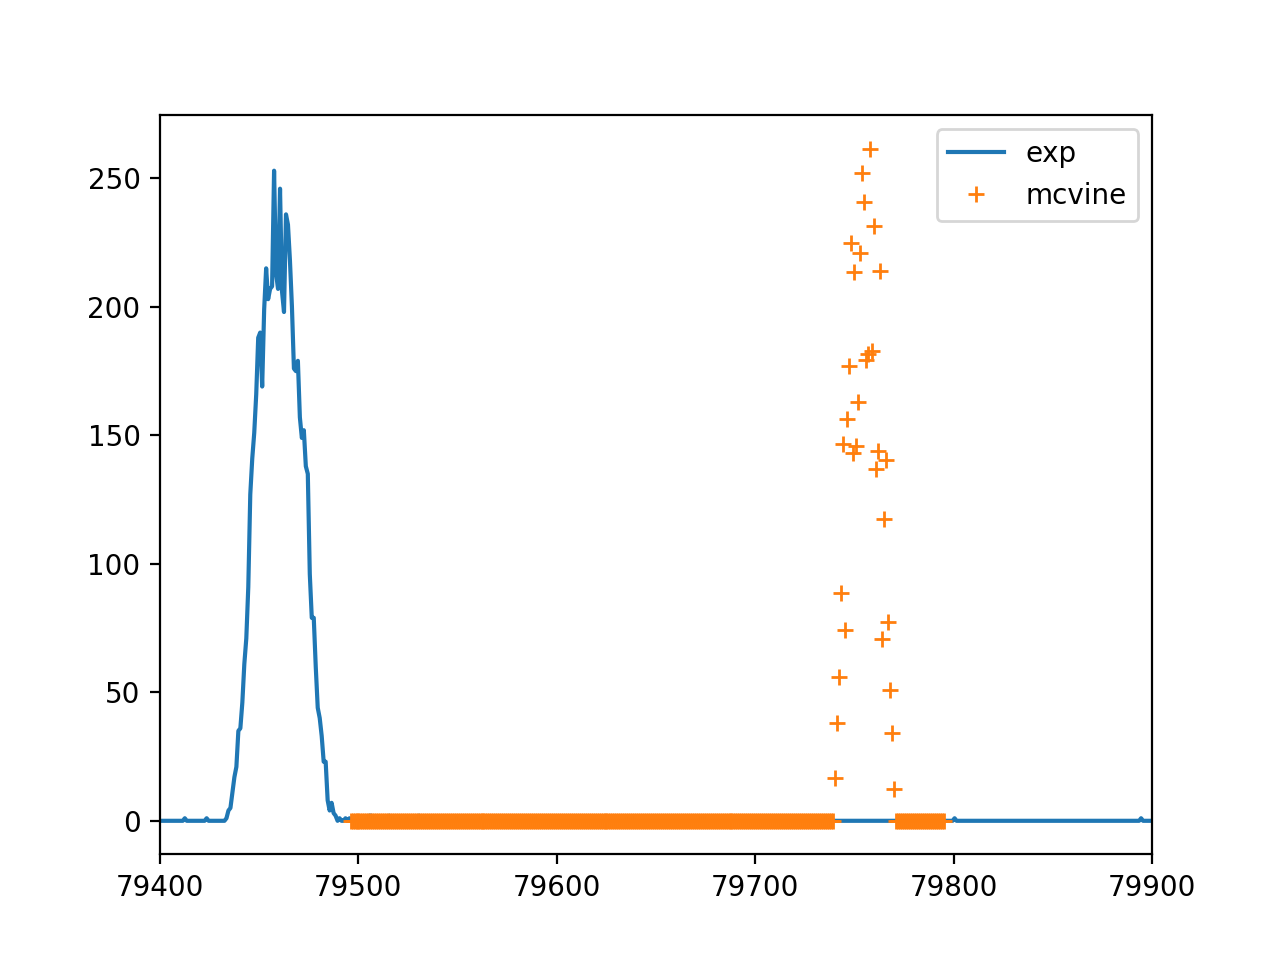

(79400, 79900)

In [67]:
xbb = exp_m1.extractX()[0]
x = (xbb[1:]+xbb[:-1])/2

y = exp_m1.extractY()[0]

plt.figure()
plt.plot(x, y, label='exp')
plt.plot(m3.tof*1e6, m3.I*.35, '+', label='mcvine')
plt.legend()
plt.xlim(79400, 79900)

<IPython.core.display.Javascript object>


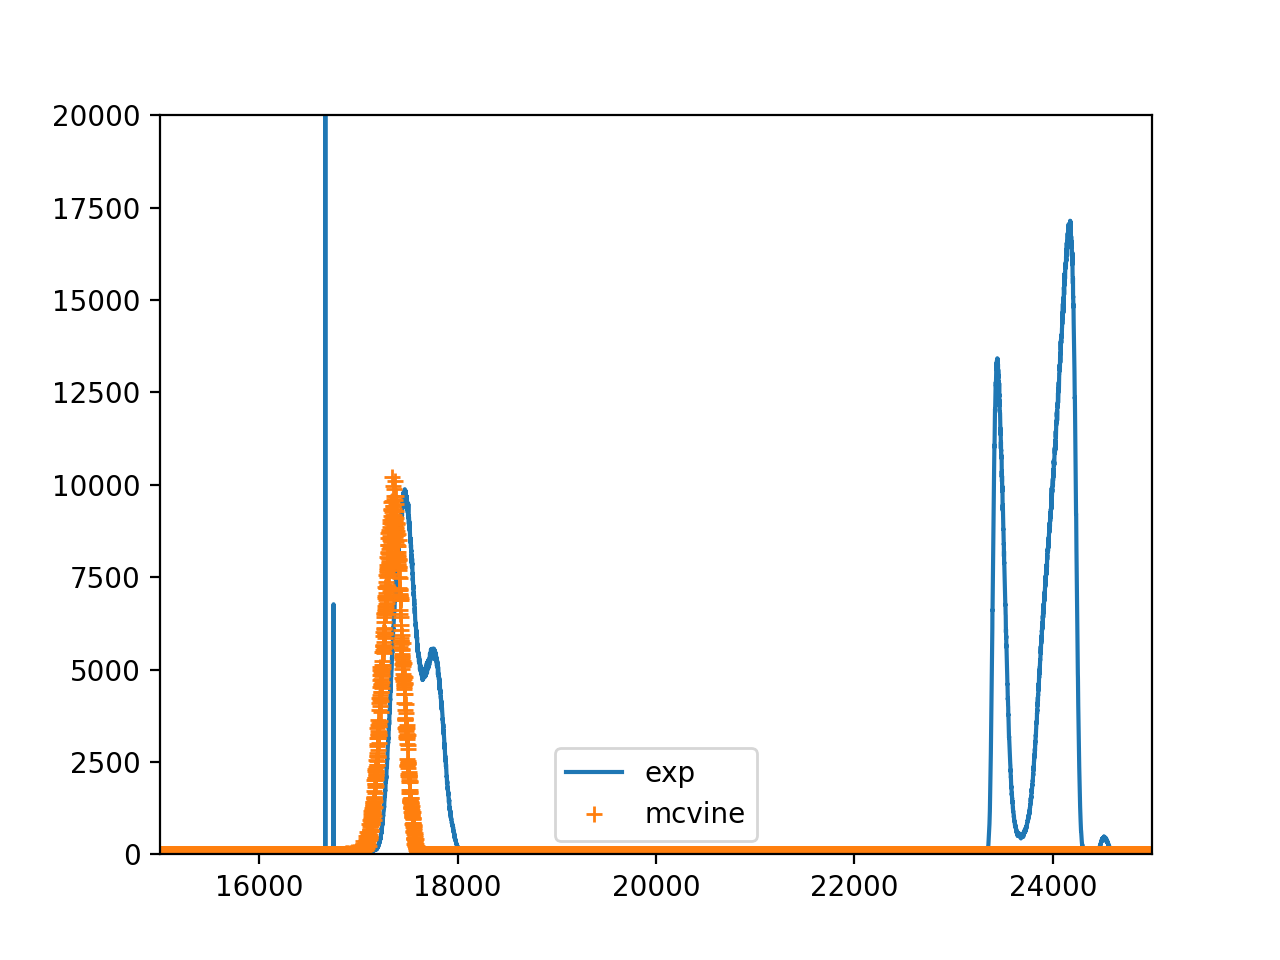

(0, 20000)

In [66]:
xbb = exp_m0.extractX()[0]
x = (xbb[1:]+xbb[:-1])/2

y = exp_m0.extractY()[0]

plt.figure()
plt.plot(x, y, label='exp')
plt.plot(m2.tof*1e6, m2.I*.16, '+', label='mcvine')
plt.legend()
plt.xlim(15000, 25000)
plt.ylim(0, 20000)

In [46]:
7.515/conv.e2v(1.)*1e6

17181.332599744215

In [48]:
1.e6/300*2 + 17181.332599744215

23847.999266410883

In [170]:
!mcvine neutronstorage count ./Ei_1meV_check_monitors/beam-Ei_1.0-fluxmode_2.0/out/neutrons

3784


# Ei=20meV high resolution

In [138]:
mkdir -p Ei_20meV_check_monitors/beam-Ei_20-fluxmode_2.0

In [139]:
%%time
run_script.run_mpi(
    './CNCS_Dec_2016_py_mcvine.py', 'Ei_20meV_check_monitors/beam-Ei_20-fluxmode_2.0/_m2sout', 
    ncount=1e9, nodes=20,
    Ei=20, Erange_fraction=0.2,
    fluxmode=2.0, f41=180., f42=180.
)

CPU times: user 3.86 ms, sys: 235 ms, total: 238 ms
Wall time: 20min 49s


Run postprocessing so that this works with other apps such as resolution calculation

In [142]:
from mcvine.instruments.CNCS import beam_postprocessing as bpp

In [146]:
bpp.run(
    './Ei_20meV_check_monitors/beam-Ei_20-fluxmode_2.0/_m2sout/', 
    './Ei_20meV_check_monitors/beam-Ei_20-fluxmode_2.0/out',
    20.
)

Running beam monitors...
 -> running mcvine_analyze_beam --output-dir=./Ei_20meV_check_monitors/beam-Ei_20-fluxmode_2.0/out --ncount=1639 --buffer_size=1639 --geometer.source="((0,0,-0.15),(0,0,0))" --source.path=./Ei_20meV_check_monitors/beam-Ei_20-fluxmode_2.0/_m2sout/neutrons --monitor.mtof.tofmin=0.016685186977609453 --monitor.mtof.tofmax=0.02039300630596711 --monitor.mtof.ntof=1000 --monitor.menergy.energymin=18.0 --monitor.menergy.energymax=22.0 --monitor.menergy.nenergy=1000...
done.


<IPython.core.display.Javascript object>


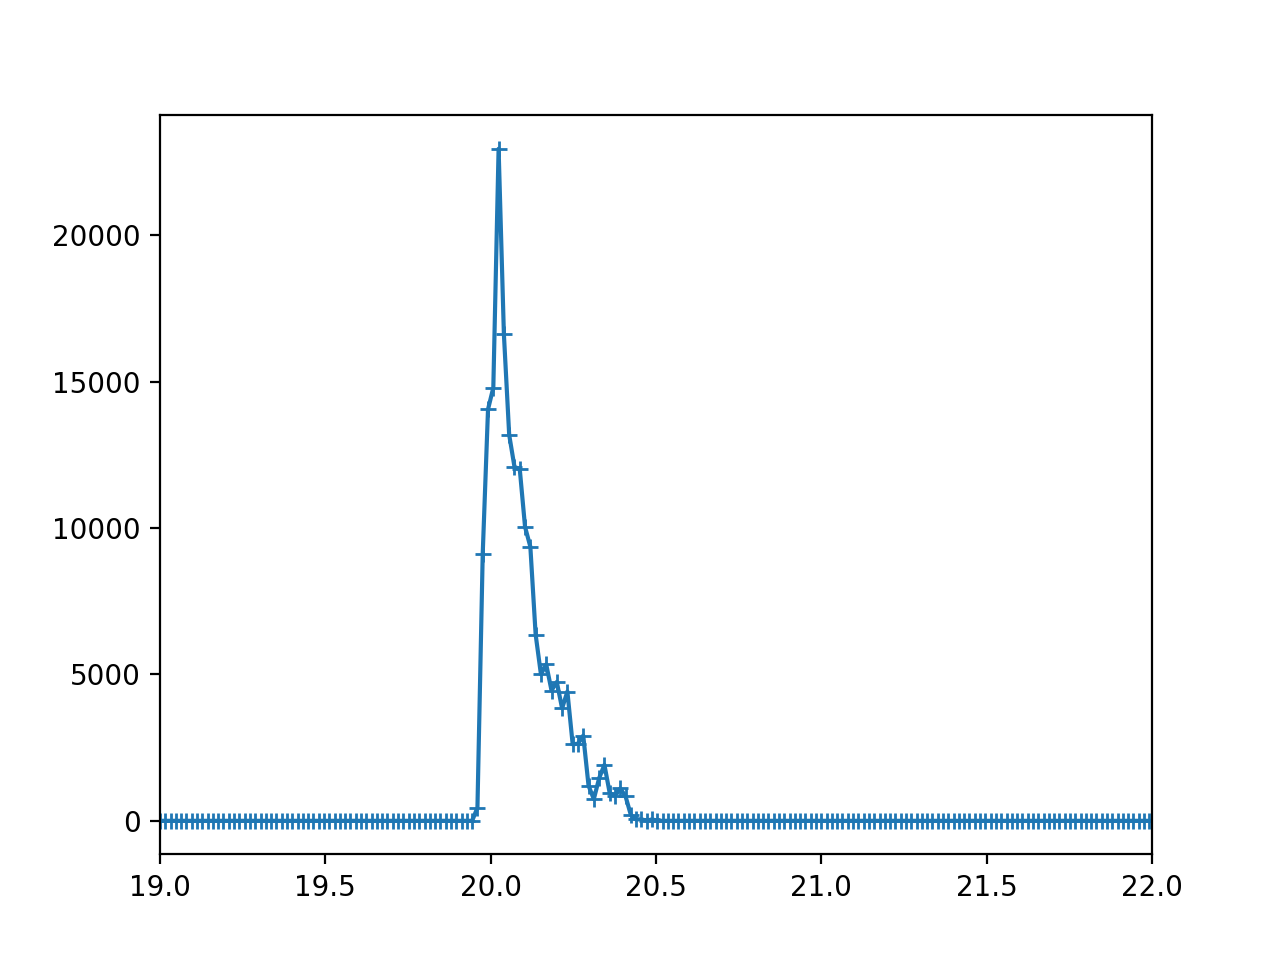

(19, 22)

In [149]:
plt.figure()
IE = hh.load('./Ei_20meV_check_monitors/beam-Ei_20-fluxmode_2.0/_m2sout/beam_I_E.h5')
plt.plot(IE.energy, IE.I, '+-')
plt.xlim(19, 22)

<IPython.core.display.Javascript object>


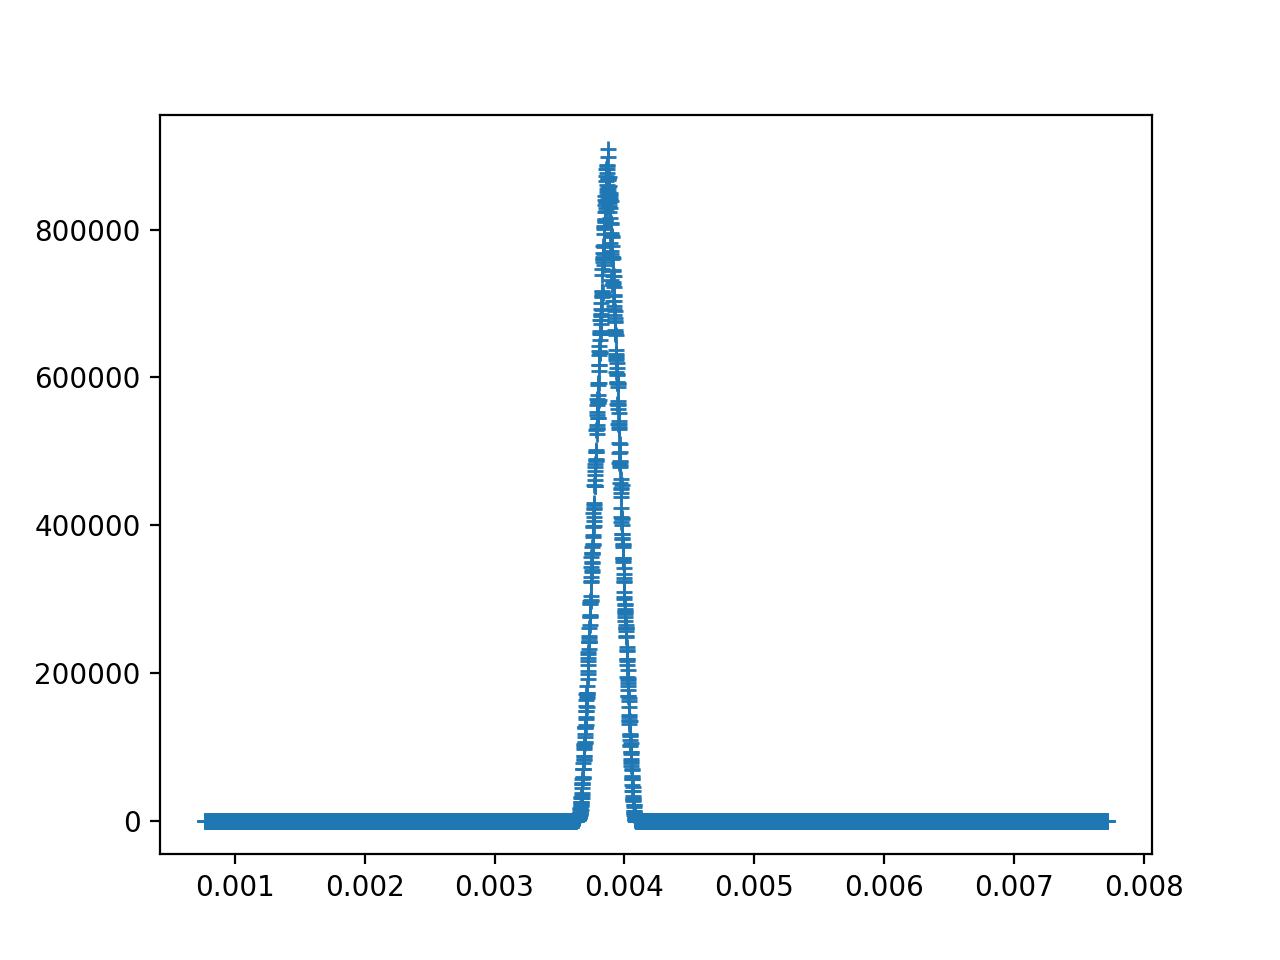

In [151]:
plt.figure()
m2 = hh.load('./Ei_20meV_check_monitors/beam-Ei_20-fluxmode_2.0/_m2sout/tof2.h5')
plt.plot(m2.tof, m2.I, '+')
# plt.xlim(0.0165, 0.0179)

<IPython.core.display.Javascript object>


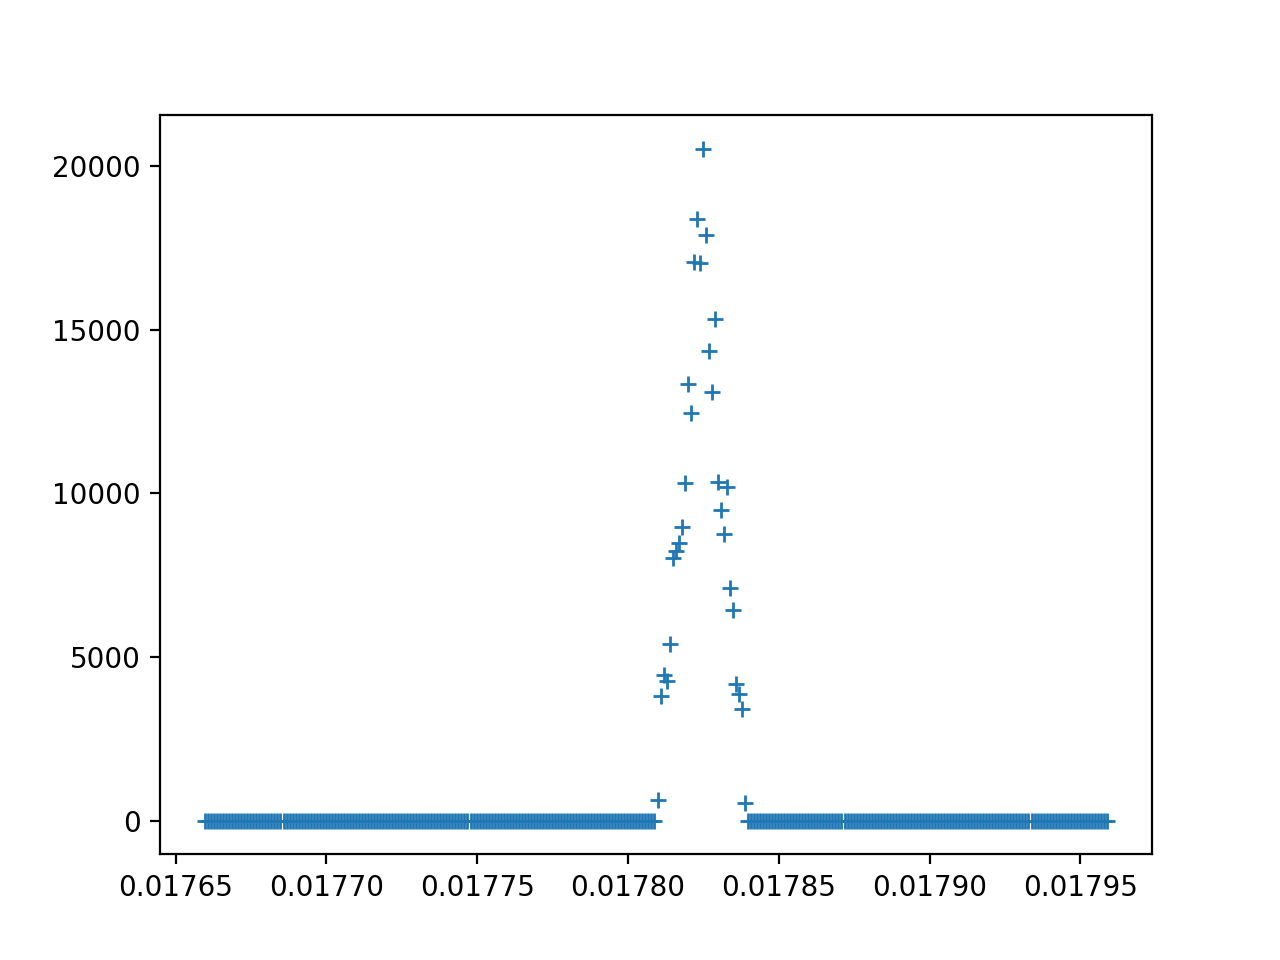

In [153]:
plt.figure()
m3 = hh.load('./Ei_20meV_check_monitors/beam-Ei_20-fluxmode_2.0/_m2sout/tof3a.h5')
plt.plot(m3.tof, m3.I, '+')
# plt.xlim(0.0797, 0.0798)

In [154]:
mons = msa.LoadNexusMonitors("/SNS/CNCS/IPTS-20360/nexus/CNCS_274512.nxs.h5")

In [155]:
msa.Rebin(InputWorkspace='mons', OutputWorkspace='mons', Params="%s,%s,%s" % (0, 1., 80000))

EventWorkspace
Title: V-foil HR, T=300 K, Ei=20.43628 meV
Histograms: 2
Bins: 80000
Histogram
X axis: Time-of-flight / microsecond
Y axis: Counts
Distribution: False
Instrument: CNCS (2017-Aug-07 to 2100-Jan-31)Instrument from: /SNS/CNCS/IPTS-20360/nexus/CNCS_274526.nxs.h5

Parameters from: /SNS/users/lj7/.mantid/instrument/CNCS_Parameters.xml
Run start: 2018-Jun-07 23:55:19
Run end:  2018-Jun-08 00:35:09

Events: 26733067

In [156]:
mons.getNumberHistograms()

2

In [157]:
m1 = msa.CropWorkspace(mons, StartWorkspaceIndex = 1, EndWorkspaceIndex = 1)

In [158]:
m0 = msa.CropWorkspace(mons, StartWorkspaceIndex = 0, EndWorkspaceIndex = 0)

<IPython.core.display.Javascript object>


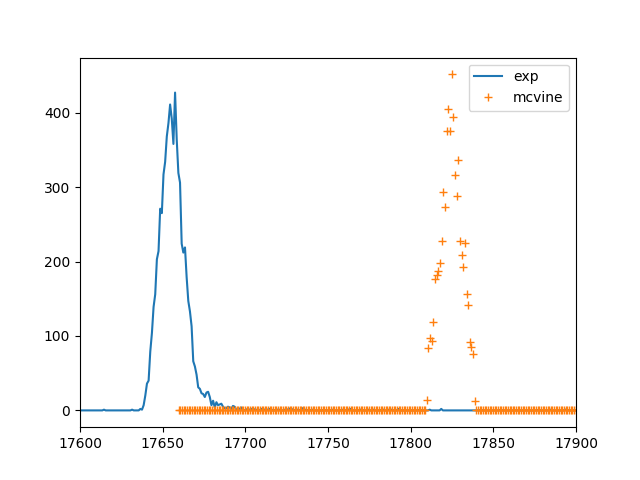

(17600, 17900)

In [163]:
xbb = m1.extractX()[0]
x = (xbb[1:]+xbb[:-1])/2

y = m1.extractY()[0]

plt.figure()
plt.plot(x, y, label='exp')
plt.plot(m3.tof*1e6, m3.I*.022, '+', label='mcvine')
plt.legend()
plt.xlim(17600, 17900)

<IPython.core.display.Javascript object>


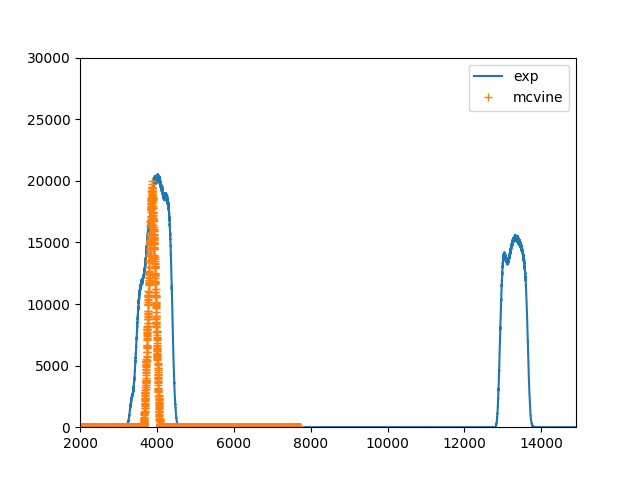

(0, 30000)

In [169]:
xbb = m0.extractX()[0]
x = (xbb[1:]+xbb[:-1])/2

y = m0.extractY()[0]

plt.figure()
plt.plot(x, y, label='exp')
plt.plot(m2.tof*1e6, m2.I*.022, '+', label='mcvine')
plt.legend()
plt.xlim(2000, 14900)
plt.ylim(0, 30000)

In [171]:
!mcvine neutronstorage count ./Ei_20meV_check_monitors/beam-Ei_20-fluxmode_2.0/out/neutrons

1639
